# Physics-informed neural networks for differential equations

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [102]:
class DiffEqRegularization(tf.keras.layers.Layer):
    def __init__(self, model):
        super(DiffEqRegularization, self).__init__()
        self.model = model
        
    def call(self, x):
        with tf.GradientTape() as hess:
            with tf.GradientTape() as grad:
                hess.watch(x)
                grad.watch(x)
                
                u = self.model(x)
                
            du_dx = grad.gradient(u, x)
            
        d2u_dx2 = hess.gradient(du_dx, x)
                        
        residual = d2u_dx2 - 4 * du_dx - 5 * u
        self.add_loss(tf.reduce_mean(tf.square(residual)))
        tf.print("Residual ", tf.reduce_mean(tf.square(residual)))
        
        return (u, residual)

In [103]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(10, input_shape=(1,), activation="sigmoid"),
        tf.keras.layers.Dense(1),
    ]
)

x = tf.keras.layers.Input(shape=(1,))
u, residual = DiffEqRegularization(model)(x)
pinn = tf.keras.Model(inputs=[x], outputs=[u, residual])

pinn.compile(loss=["mse", "mse"], optimizer=tf.keras.optimizers.SGD(learning_rate=0.001))

train_x = np.reshape(np.linspace(0, 1, num=101), (-1, 1))
history = pinn.fit(train_x, epochs=20, verbose=1)

Epoch 1/20
Residual  12.078476
1/4 [======>.......................] - ETA: 0s - loss: 12.0785 - diff_eq_regularization_19_loss: 0.0000e+00 - diff_eq_regularization_19_1_loss: 0.0000e+00Residual  8.32290268
Residual  5.76867294
Residual  4.79193783
4/4 [==============================] - 0s 2ms/step - loss: 7.7405 - diff_eq_regularization_19_loss: 0.0000e+00 - diff_eq_regularization_19_1_loss: 0.0000e+00
Epoch 2/20
Residual  2.37960958
1/4 [======>.......................] - ETA: 0s - loss: 2.3796 - diff_eq_regularization_19_loss: 0.0000e+00 - diff_eq_regularization_19_1_loss: 0.0000e+00Residual  1.59105289
Residual  1.12387478
Residual  0.811251462
4/4 [==============================] - 0s 2ms/step - loss: 1.4764 - diff_eq_regularization_19_loss: 0.0000e+00 - diff_eq_regularization_19_1_loss: 0.0000e+00
Epoch 3/20
Residual  0.53104353
1/4 [======>.......................] - ETA: 0s - loss: 0.5310 - diff_eq_regularization_19_loss: 0.0000e+00 - diff_eq_regularization_19_1_loss: 0.0000e+00Re

Text(0, 0.5, 'Loss')

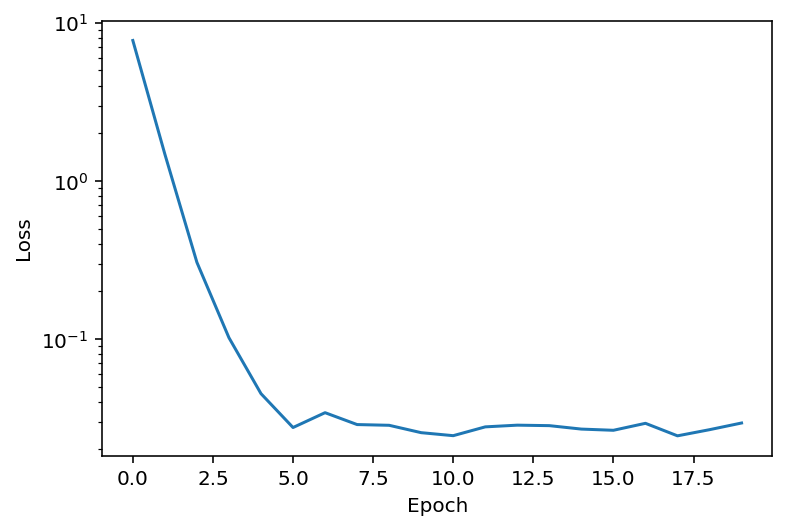

In [104]:
plt.figure()
plt.semilogy(history.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [107]:
test_x = np.reshape(np.linspace(0, 1, num=101), (-1, 1))
true_soln = 1.0/6.0 * np.exp(5*test_x) + 5.0/6.0 * np.exp(-test_x)

test_y, _ = pinn.predict(train_x)

Residual  0.0370970406
Residual  0.00274408446
Residual  0.0334667787
Residual  0.0726301521


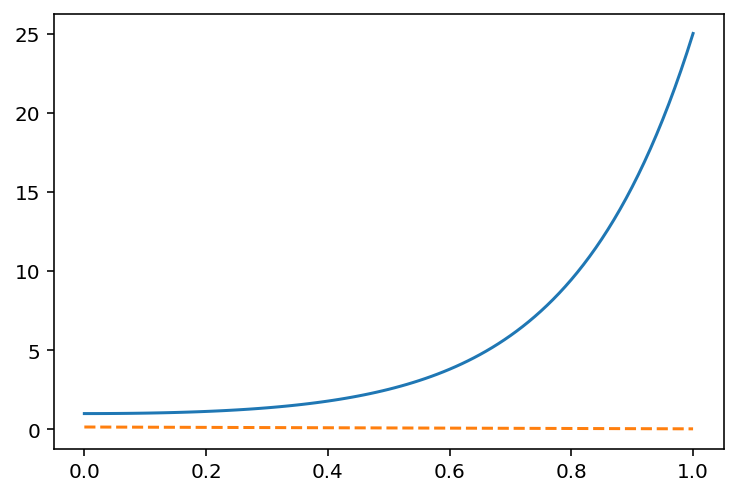

In [108]:
plt.figure()
plt.plot(test_x, true_soln, "-", label="True soln")
plt.plot(test_x, test_y, "--", label="NN approx")

In [109]:
pinn.predict(train_x)

Residual  0.0370970406
Residual  0.00274408446
Residual  0.0334667787
Residual  0.0726301521


[array([[0.15067516],
        [0.1494867 ],
        [0.14829801],
        [0.14710943],
        [0.1459207 ],
        [0.14473192],
        [0.1435432 ],
        [0.14235447],
        [0.14116575],
        [0.13997713],
        [0.13878863],
        [0.1376002 ],
        [0.13641192],
        [0.13522379],
        [0.13403584],
        [0.13284813],
        [0.13166067],
        [0.13047346],
        [0.12928654],
        [0.12809995],
        [0.1269137 ],
        [0.12572782],
        [0.1245423 ],
        [0.1233571 ],
        [0.12217243],
        [0.12098823],
        [0.11980446],
        [0.11862123],
        [0.11743844],
        [0.11625632],
        [0.11507472],
        [0.11389372],
        [0.11271336],
        [0.11153364],
        [0.11035454],
        [0.10917619],
        [0.10799857],
        [0.10682173],
        [0.10564557],
        [0.10447016],
        [0.10329571],
        [0.10212196],
        [0.10094922],
        [0.09977717],
        [0.09860616],
        [0

In [71]:
pinn.layers[-1].model.input

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_24_input')>

In [101]:
history.history

{'loss': [10.251306533813477,
  2.0144572257995605,
  0.4075077772140503,
  0.0891527533531189,
  0.020810719579458237,
  0.01240501832216978,
  0.008821578696370125,
  0.00711354985833168,
  0.007599477656185627,
  0.007443917915225029,
  0.008009836077690125,
  0.008072737604379654,
  0.006908515468239784,
  0.008865044452250004,
  0.00720113143324852,
  0.008208639919757843,
  0.0076703825034201145,
  0.007879316806793213,
  0.0072359186597168446,
  0.007344103418290615],
 'diff_eq_regularization_18_loss': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'diff_eq_regularization_18_1_loss': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0]}

In [100]:
pinn.losses

[<tf.Tensor 'model_5/diff_eq_regularization_18/Mean:0' shape=() dtype=float32>]